### Training dataset visualisation through reduction of dimensionality

In [1]:
import os
import pandas as pd
from configs.config_local import DATASET_PATH
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

train_data_path = os.path.join(DATASET_PATH, "training_features_40_512_256_128.parquet")
train_df = pd.read_parquet(train_data_path)
train_df.dropna(inplace=True)

# Split features and labels
def split_xy(df):
    X = df.drop(columns=["label", "filename"], errors="ignore")
    y = df["label"].map({"real": 0, "fake": 1}).values
    return X.values, y, X.columns.tolist()

X_train, y_train, feature_names = split_xy(train_df)




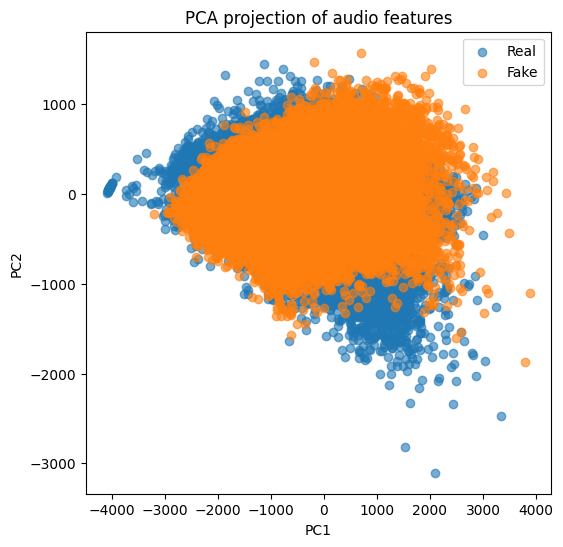

In [2]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(6,6))
plt.scatter(X_pca[y_train==0,0], X_pca[y_train==0,1], label='Real', alpha=0.6)
plt.scatter(X_pca[y_train==1,0], X_pca[y_train==1,1], label='Fake', alpha=0.6)
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA projection of audio features")
plt.show()


In [3]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd


# 3D PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

# Create a DataFrame for Plotly
df_plot = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "PC3": X_pca[:, 2],
    "Label": y_train
})

# Plot
fig = px.scatter_3d(
    df_plot,
    x="PC1",
    y="PC2",
    z="PC3",
    color="Label",
    opacity=0.7,
    title="3D PCA of Audio Features"
)

fig.update_layout(
    scene=dict(
        xaxis_title="PC1",
        yaxis_title="PC2",
        zaxis_title="PC3"
    )
)

fig.show()


c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



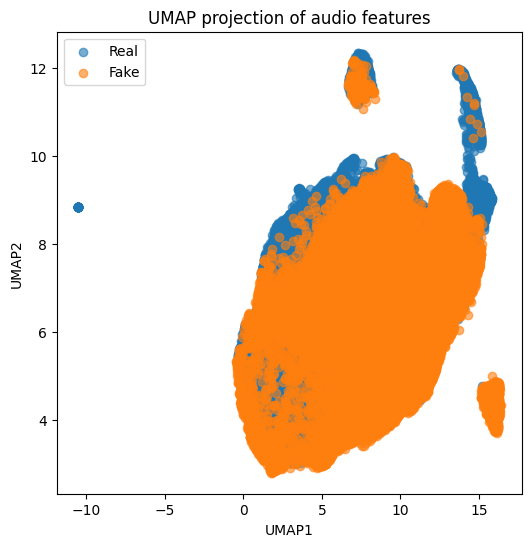

In [4]:
import umap

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_train)

plt.figure(figsize=(6,6))
plt.scatter(X_umap[y_train==0,0], X_umap[y_train==0,1], label='Real', alpha=0.6)
plt.scatter(X_umap[y_train==1,0], X_umap[y_train==1,1], label='Fake', alpha=0.6)
plt.legend()
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("UMAP projection of audio features")
plt.show()
